In [1]:
import numpy as np

def x2y( A, B, x):
    # A > B
    return( np.tan( np.pi*((x - B)/(A-B) - 1/2 ) ) ) 

def y2x( A, B, y):
           return( B + (0.5 + np.arctan(y)/np.pi) * ( A - B) )

In [2]:
A = 100
B = 0

#x = 1.0
#y = x2y( A, B, x)
#print( x, y, y2x( A, B, y) )

x = np.arange( 1, 100, 1)
y = x2y( A, B, x)

import matplotlib.pyplot as plt
plt.plot( x, y )

In [3]:
# A> B
def y2x_k( A, B, y ):
    return( 0.5*(A+B) + 0.5 * np.tanh(y)*(A-B) )

In [4]:
def x2y_k( A, B, x):
    y = x - 0.5*( A + B )
    y = 2 * y / (A - B)
    return( np.arctanh(y) )

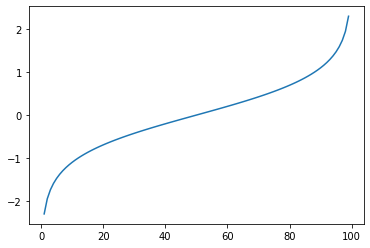

In [5]:
A = 100
B = 0
#y = x2y_k( A, B, x)
#print(x, y, y2x_k( A, B, y) )

x = np.arange( 1, 100, 1)
y = x2y_k( A, B, x)


plt.plot( x, y )

In [6]:
# Linearity

A = 100
B = 0

x_org = np.arange(1, 100, 10)
x_orgp = x_org - np.mean( x_org )

#print( x_org )

print( "Nielsen-Gammon et al. 2010MWR" )
y_org = x2y( A, B, x_org )

y_orgm = np.mean( y_org )
y_orgp = y_org - np.mean( y_org )
res = y2x( A, B, y_orgm + y_orgp ) - x_org
if res.all() == 0.0:
    print( "Linear" )

xc = np.arange( 40, 61, 1 )
xl = np.arange( 1,21,1)
yc = x2y( A, B, xc)
yl = x2y( A, B, xl)

print( "Spread ratio: {0:.4f}".format( np.std(yl, ddof=1)/ np.std(yc, ddof=1) ) ) 

print("")
    
print( "Kotsuki et al. 2018JGRA" )
y_org = x2y_k( A, B, x_org )

y_orgm = np.mean( y_org )
y_orgp = y_org - np.mean( y_org )
res = y2x_k( A, B, y_orgm + y_orgp ) - x_org
if res.all() == 0.0:
    print( "Linear" )

yc = x2y_k( A, B, xc)
yl = x2y_k( A, B, xl)

print( "Spread ratio: {0:.4f}".format( np.std(yl, ddof=1)/ np.std(yc, ddof=1) ) ) 


Nielsen-Gammon et al. 2010MWR
Linear
Spread ratio: 35.9198

Kotsuki et al. 2018JGRA
Linear
Spread ratio: 3.4910


$$
    \frac{1}{2}\log\frac{1+z_a}{1-z_a} = \frac{1}{2}\log\frac{1+z_b}{1-z_b} + K \left( \frac{1}{2}\log\frac{1+z_o}{1-z_o} - \frac{1}{2}\log\frac{1+z_b}{1-z_b} \right) \\
     \log\frac{1+z_a}{1-z_a} = \log\frac{1+z_b}{1-z_b} + K \left( \log\frac{1+z_o}{1-z_o} - \log\frac{1+z_b}{1-z_b} \right) \\
     \log\frac{1+z_a}{1-z_a} = \log\frac{1+z_b}{1-z_b} + \log \left ( \frac{(1+z_o)(1-z_b)}{(1-z_o)(1+z_b)} \right )^K \\
     \log\frac{1+z_a}{1-z_a} = \log\frac{(1+z_b)(1+z_o)^K(1-z_b)^K}{(1-z_b)(1-z_o)^K(1+z_b)^K} \\
     \log\frac{1+z_a}{1-z_a} = \log\frac{(1+z_b)^{1-K}(1+z_o)^K}{(1-z_b)^{1-K}(1-z_o)^K} \\
     \frac{1+z_a}{1-z_a} = \frac{(1+z_b)^{1-K}(1+z_o)^K}{(1-z_b)^{1-K}(1-z_o)^K} \\
     \left(1+\frac{(1+z_b)^{1-K}(1+z_o)^K}{(1-z_b)^{1-K}(1-z_o)^K} \right) z_a = \frac{(1+z_b)^{1-K}(1+z_o)^K}{(1-z_b)^{1-K}(1-z_o)^K} - 1 \\
     \left(\frac{ (1+z_b)^{1-K}(1+z_o)^K + (1-z_b)^{1-K}(1-z_o)^K }{(1-z_b)^{1-K}(1-z_o)^K} \right) z_a = \frac{(1+z_b)^{1-K}(1+z_o)^K - (1-z_b)^{1-K}(1-z_o)^K}{(1-z_b)^{1-K}(1-z_o)^K}  \\
       z_a = \frac{ (1+z_b)^{1-K}(1+z_o)^K - (1-z_b)^{1-K}(1-z_o)^K }{(1+z_b)^{1-K}(1+z_o)^K + (1-z_b)^{1-K}(1-z_o)^K} \\
$$